# 第9章 数据聚合与分组运算

## GroupBy技术

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [4]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [5]:
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [6]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [7]:
means.unstack()

key2,one,two
key1,,
a,0.880536,0.478943
b,-0.519439,-0.555730


In [8]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.478943
            2006   -0.519439
Ohio        2005   -0.380219
            2006    1.965781
Name: data1, dtype: float64

In [9]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.746672,0.910916
b,-0.537585,0.525384


In [10]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.880536  1.319920
     two   0.478943  0.092908
b    one  -0.519439  0.281746
     two  -0.555730  0.769023

In [11]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### 对分组进行迭代

In [12]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [13]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
('b', 'two')
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [14]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two


In [15]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [17]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## 选取一个或一列组

In [18]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [19]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [20]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [21]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [22]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### 通过字典或Series进行分组

In [23]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [24]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [25]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.503905,1.063885
Steve,1.297183,-1.553778
Wes,-1.021228,-1.116829
Jim,0.524712,1.770545
Travis,-4.230992,-2.405455


In [26]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [27]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 通过函数进行分组

In [28]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.591569,-0.993608,0.798764,-0.791374,2.119639
5,0.886429,-2.001637,-0.371843,1.669025,-0.438570
6,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [29]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

### 根据索引级别分组

In [30]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [31]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 数据聚合

In [32]:
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [33]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [34]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.170488,1.300498
b,0.036292,0.487276


In [35]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.746672  1.109736 -0.204708  0.137118  0.478943  1.222362   
b      2.0 -0.537585  0.025662 -0.555730 -0.546657 -0.537585 -0.528512   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.965781   3.0  0.910916  0.712217  0.092908  0.669671  1.246435   
b    -0.519439   2.0  0.525384  0.344556  0.281746  0.403565  0.525384   

                          
           75%       max  
key1                      
a     1.319920  1.393406  
b     0.647203  0.769023

In [36]:
tips = pd.read_csv('tips.csv')

In [37]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


### 面向列的多函数应用

In [38]:
grouped = tips.groupby(['sex', 'smoker'])

In [39]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [40]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [41]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [42]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [43]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [44]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [45]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [46]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### 以“无索引”的形式返回聚合数据

In [48]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## 分组级运算和转换

In [47]:
df

,data1,data2,key1,key2
0,-0.204708,1.393406,a,one
1,0.478943,0.092908,a,two
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two
4,1.965781,1.246435,a,one


In [49]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.746672,0.910916
b,-0.537585,0.525384


In [50]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.204708,1.393406,a,one,0.746672,0.910916
1,0.478943,0.092908,a,two,0.746672,0.910916
4,1.965781,1.246435,a,one,0.746672,0.910916
2,-0.519439,0.281746,b,one,-0.537585,0.525384
3,-0.555730,0.769023,b,two,-0.537585,0.525384


In [51]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
two,0.505275,-0.849512,0.075965,0.834983,0.452620


In [52]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
Steve,0.505275,-0.849512,0.075965,0.834983,0.452620
Wes,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309
Jim,0.505275,-0.849512,0.075965,0.834983,0.452620
Travis,-0.082032,-1.063687,-1.047620,-0.884358,-0.028309


In [53]:
def demean(arr):
    return arr - arr.mean()

In [54]:
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,1.089221,-0.232534,1.322612,1.113271,1.381226
Steve,0.381154,-1.152125,-0.447807,0.834043,-0.891190
Wes,-0.457709,NaN,NaN,-0.136869,-0.548778
Jim,-0.381154,1.152125,0.447807,-0.834043,0.891190
Travis,-0.631512,0.232534,-1.322612,-0.976402,-0.832448


In [55]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,0.000000e+00,-1.110223e-16,0.0,7.401487e-17,0.0
two,-2.775558e-17,0.000000e+00,0.0,0.000000e+00,0.0


## apply：一般性的“拆分-应用-合并”

In [56]:
def top(df, n=5, column='tip_pct'): 
    return df.sort_index(by=column)[-n:]

In [57]:
top(tips, n=6)

/Users/sunrongcheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [58]:
tips.groupby('smoker').apply(top)

/Users/sunrongcheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [59]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

/Users/sunrongcheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [60]:
result = tips.groupby('smoker')['tip_pct'].describe() 
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [61]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [62]:
f = lambda x: x.describe() 
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
...                         ...        ...        ...        ...
Male   No     75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

[32 rows x 4 columns]

### 禁止分组键

In [63]:
tips.groupby('smoker', group_keys=False).apply(top)

/Users/sunrongcheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


## 分位数和桶分析

In [64]:
frame = DataFrame({'data1': np.random.randn(1000), 'data2': np.random.randn(1000)})

In [65]:
factor = pd.cut(frame.data1, 4)
factor[:10]

0     (-1.23, 0.489]
1    (-2.956, -1.23]
2     (-1.23, 0.489]
3     (0.489, 2.208]
4     (-1.23, 0.489]
5     (0.489, 2.208]
6     (-1.23, 0.489]
7     (-1.23, 0.489]
8     (0.489, 2.208]
9     (0.489, 2.208]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [66]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [67]:
grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.956, -1.23]",95.0,1.670835,-0.039521,-3.399312
"(-1.23, 0.489]",598.0,3.260383,-0.002051,-2.989741
"(0.489, 2.208]",297.0,2.954439,0.081822,-3.745356
"(2.208, 3.928]",10.0,1.765640,0.024750,-1.929776


In [68]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)

In [69]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,1.670835,-0.049902,-3.399312
1,100.0,2.628441,0.030989,-1.950098
2,100.0,2.527939,-0.067179,-2.925113
3,100.0,3.260383,0.065713,-2.315555
4,100.0,2.074345,-0.111653,-2.047939
5,100.0,2.184810,0.052130,-2.989741
6,100.0,2.458842,-0.021489,-2.223506
7,100.0,2.954439,-0.026459,-3.056990
8,100.0,2.735527,0.103406,-3.745356


## 示例：用特定于分组的值填充缺失值

In [70]:
s = Series(np.random.randn(6))

In [71]:
s[::2] = np.nan
s

0         NaN
1   -0.125921
2         NaN
3   -0.884475
4         NaN
5    0.227290
dtype: float64

In [72]:
s.fillna(s.mean())

0   -0.261035
1   -0.125921
2   -0.261035
3   -0.884475
4   -0.261035
5    0.227290
dtype: float64

In [73]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']

In [74]:
group_key = ['East'] * 4 + ['West'] * 4

In [76]:
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.922264
New York     -2.153545
Vermont            NaN
Florida      -0.375842
Oregon        0.329939
Nevada             NaN
California    1.105913
Idaho              NaN
dtype: float64

In [77]:
data.groupby(group_key).mean()

East   -0.535707
West    0.717926
dtype: float64

In [78]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.922264
New York     -2.153545
Vermont      -0.535707
Florida      -0.375842
Oregon        0.329939
Nevada        0.717926
California    1.105913
Idaho         0.717926
dtype: float64

In [79]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

In [80]:
data.groupby(group_key).apply(fill_func)

Ohio          0.922264
New York     -2.153545
Vermont       0.500000
Florida      -0.375842
Oregon        0.329939
Nevada       -1.000000
California    1.105913
Idaho        -1.000000
dtype: float64

## 示例：分组加权平均数和相关系数

In [81]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 'data': np.random.randn(8),
'weights': np.random.rand(8)})
df

,category,data,weights
0,a,1.561587,0.383597
1,a,0.406510,0.061095
2,a,0.359244,0.824554
3,a,-0.614436,0.381261
4,b,-1.691656,0.132297
5,b,0.758701,0.876379
6,b,-0.682273,0.510716
7,b,-1.038534,0.324901


In [83]:
close_px = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33
1990-02-08,5.04,7.71,2.92,17.86,4.46,0.51,6.22,332.96,6.35
1990-02-09,5.06,8.00,2.94,17.82,4.49,0.52,6.24,333.62,6.37
1990-02-12,4.96,7.94,2.89,17.58,4.46,0.52,6.23,330.08,6.22
1990-02-13,4.91,8.06,2.88,17.95,4.43,0.52,6.09,331.02,6.23
1990-02-14,4.94,8.00,2.89,18.04,4.47,0.52,6.10,332.01,6.20


In [84]:
close_px[-4:]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37
2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11


In [85]:
rets = close_px.pct_change().dropna()

In [86]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [87]:
by_year = rets.groupby(lambda x: x.year)

In [88]:
by_year.apply(spx_corr)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990,0.595024,0.545067,0.752187,0.738361,0.801145,0.586691,0.783168,1.0,0.517586
1991,0.453574,0.365315,0.759607,0.557046,0.646401,0.524225,0.641775,1.0,0.569335
1992,0.398180,0.498732,0.632685,0.262232,0.515740,0.492345,0.473871,1.0,0.318408
1993,0.259069,0.238578,0.447257,0.211269,0.451503,0.425377,0.385089,1.0,0.318952
1994,0.428549,0.268420,0.572996,0.385162,0.372962,0.436585,0.450516,1.0,0.395078
1995,0.291532,0.161829,0.519126,0.416390,0.315733,0.453660,0.413144,1.0,0.368752
1996,0.292344,0.191482,0.750724,0.388497,0.569232,0.564015,0.421477,1.0,0.538736
1997,0.564427,0.211435,0.827512,0.646823,0.703538,0.606171,0.509344,1.0,0.695653
1998,0.533802,0.379883,0.815243,0.623982,0.591988,0.698773,0.494213,1.0,0.369264
1999,0.099033,0.425584,0.710928,0.486167,0.517061,0.631315,0.336593,1.0,0.315383


In [89]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

1990    0.408271
1991    0.266807
1992    0.450592
1993    0.236917
1994    0.361638
1995    0.258642
1996    0.147539
1997    0.196144
1998    0.364106
1999    0.329484
          ...   
2002    0.571435
2003    0.486262
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
Length: 22, dtype: float64

## 示例：面向分组的线性回归

In [91]:
import statsmodels.api as sm 
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars] 
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() 
    return result.params

In [92]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
1990,1.512772,0.001395
1991,1.187351,0.000396
1992,1.832427,0.000164
1993,1.390470,-0.002657
1994,1.190277,0.001617
1995,0.858818,-0.001423
1996,0.829389,-0.001791
1997,0.749928,-0.001901
1998,1.164582,0.004075
1999,1.384989,0.003273


## 透视表和交叉表

In [94]:
tips.pivot_table(index=['day', 'smoker'])
#tips.pivot_table(rows=['sex', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [96]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')
#tips.pivot_table(['tip_pct', 'size'], rows=['sex', 'day'], cols='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [97]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [98]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [99]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
...                      ...       ...       ...       ...
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

[21 rows x 4 columns]

## 交叉表：crosstab

In [104]:
data

'Sample  Nationality  Handedness\n1   USA  Right-handed\n2   Japan    Left-handed\n3   USA  Right-handed\n4   Japan    Right-handed\n5   Japan    Left-handed\n6   Japan    Right-handed\n7   USA  Right-handed\n8   USA  Left-handed\n9   Japan    Right-handed\n10  USA  Right-handed'

In [106]:
#pd.crosstab(data.Gender, data.Handedness, margins=True)
#pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## 示例：2012联邦选举委员会数据库

In [108]:
fec = pd.read_csv('P00000001-ALL.csv')
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [109]:
fec.ix[123456]

/Users/sunrongcheng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [110]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [111]:
unique_cands[2]

'Obama, Barack'

In [112]:
parties = {'Bachmann, Michelle': 'Republican', 'Cain, Herman': 'Republican',
            'Gingrich, Newt': 'Republican', 'Huntsman, Jon': 'Republican', 'Johnson, Gary Earl': 'Republican', 'McCotter, Thaddeus G': 'Republican', 'Obama, Barack': 'Democrat',
            'Paul, Ron': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Perry, Rick': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican', 'Santorum, Rick': 'Republican'}

In [113]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [114]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [115]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [116]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [117]:
fec = fec[fec.contb_receipt_amt > 0]

In [118]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

## 根据职业和雇主统计赞助信息

In [119]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [120]:
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED', 'C.E.O.': 'CEO'
}
# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x) 
fec.contbr_occupation = fec.contbr_occupation.map(f)

/Users/sunrongcheng/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [121]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x) 
fec.contbr_employer = fec.contbr_employer.map(f)

In [123]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


In [124]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [126]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [127]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

## 对出资额分组

In [128]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
              ...      
701376    (1000, 10000]
701377        (10, 100]
701378        (10, 100]
701379      (100, 1000]
701380    (1000, 10000]
701381        (10, 100]
701382      (100, 1000]
701383          (1, 10]
701384        (10, 100]
701385      (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [129]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [130]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [131]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


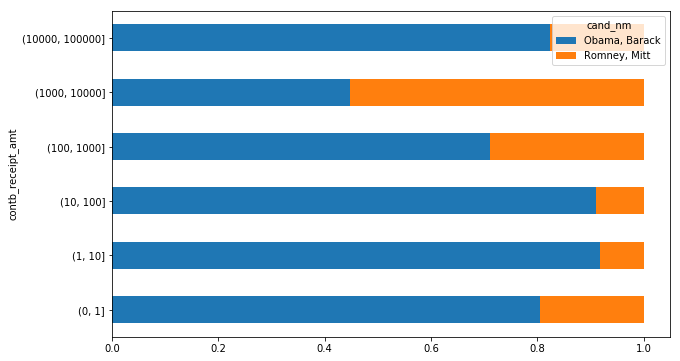

In [132]:
normed_sums[:-2].plot(kind='barh', stacked=True)

## 根据洲统计赞助信息

In [133]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [134]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [138]:
'''
from mpl_toolkits.basemap import Basemap, cm 
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection 
import matplotlib.pyplot as plt
from shapelib import ShapeFile 
import dbflib
obama = percent['Obama, Barack']
fig = plt.figure(figsize=(12, 12)) 
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lllat = 21; urlat = 53; lllon = -118; urlon = -62
m = Basemap(ax=ax, projection='stere',
lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2, llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='l')
m.drawcoastlines() 
m.drawcountries()
shp = ShapeFile('../states/statesp020') 
dbf = dbflib.open('../states/statesp020')
for npoly in range(shp.info()[0]):
# Draw colored polygons on the map 
    shpsegs = []
    shp_object = shp.read_object(npoly) 
    verts = shp_object.vertices()
    rings = len(verts)
    for ring in range(rings):
        lons, lats = zip(*verts[ring]) 
        x, y = m(lons, lats) 
        shpsegs.append(zip(x,y))
        if ring == 0:
            shapedict = dbf.read_record(npoly) 
            name = shapedict['STATE']
    lines = LineCollection(shpsegs,antialiaseds=(1,))
# state_to_code dict, e.g. 'ALASKA' -> 'AK', omitted 
    try:
        per = obama[state_to_code[name.upper()]] 
    except KeyError:
        continue
    lines.set_facecolors('k')
    lines.set_alpha(0.75 * per) # Shrink the percentage a bit 
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)
plt.show()
'''

"\nfrom mpl_toolkits.basemap import Basemap, cm \nimport numpy as np\nfrom matplotlib import rcParams\nfrom matplotlib.collections import LineCollection \nimport matplotlib.pyplot as plt\nfrom shapelib import ShapeFile \nimport dbflib\nobama = percent['Obama, Barack']\nfig = plt.figure(figsize=(12, 12)) \nax = fig.add_axes([0.1,0.1,0.8,0.8])\nlllat = 21; urlat = 53; lllon = -118; urlon = -62\nm = Basemap(ax=ax, projection='stere',\nlon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2, llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=urlon, resolution='l')\nm.drawcoastlines() \nm.drawcountries()\nshp = ShapeFile('../states/statesp020') \ndbf = dbflib.open('../states/statesp020')\nfor npoly in range(shp.info()[0]):\n# Draw colored polygons on the map \n    shpsegs = []\n    shp_object = shp.read_object(npoly) \n    verts = shp_object.vertices()\n    rings = len(verts)\n    for ring in range(rings):\n        lons, lats = zip(*verts[ring]) \n        x, y = m(lons, lats) \n     